# 3장. 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어

In [ ]:
%pip install watermark

In [3]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

Last updated: 2023-01-24

numpy     : 1.20.1
pandas    : 1.2.4
matplotlib: 3.3.4
sklearn   : 0.24.1



# 1. 사이킷런

## 1-1. 데이터 전처리

1) 붓꽃 데이터셋을 적재

클래스는 이미 정수 레이블로 변환됨
0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] #세 번째 열: 꽃잎의 길이/ 네 번째 열:은 꽃잎의 너비
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


2) 70% train data / 30% test data로 분할

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


3) 특성 표준화

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 1-2. 퍼셉트론 학습

1. 표준화된 훈련 데이터를 사용하여 퍼셉트론 학습

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

2. 잘못 예측된 샘플 갯수 총합
    (ch02.errors변수와 같은 역할)

In [12]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


3. accuracy 출력

In [15]:
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test, y_pred))
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.98
정확도: 0.98


4. 결정 경계 그림 /
     ch02:`plot_decision_region` 함수를 다시 사용

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도 그림
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

C:\Users\jsm36\AppData\Local\Temp\ipykernel_3568\2532613655.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


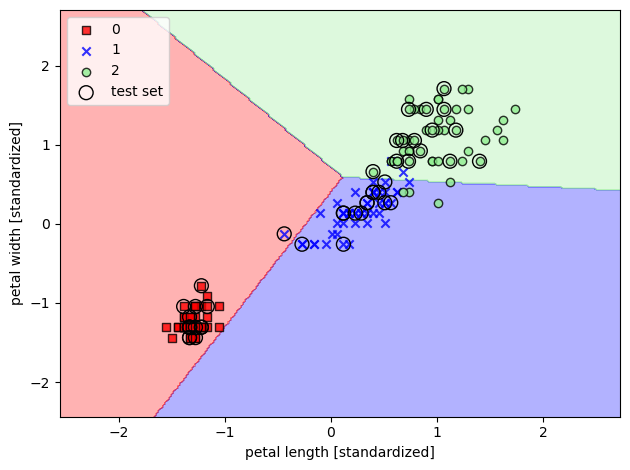

In [17]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 2. 로지스틱 회귀를 사용한 클래스 확률 모델링

### 2-1.시그모이드 곡선

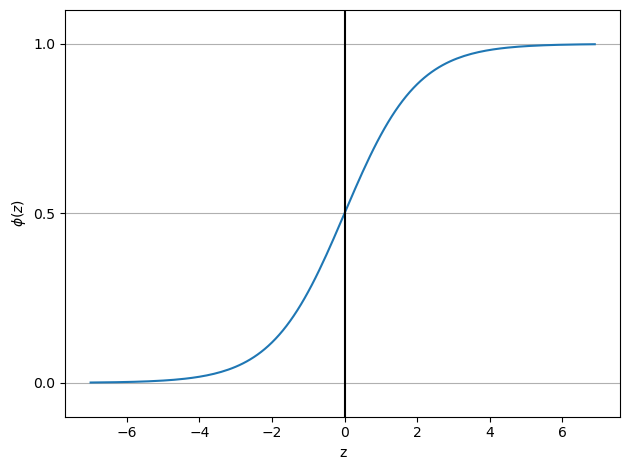

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1) #-7~7까지 0.1간격으로
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### 2-2. 로지스틱 비용 함수의 가중치 학습하기 (코딩)

1. 로지스틱 비용 그래프 비교

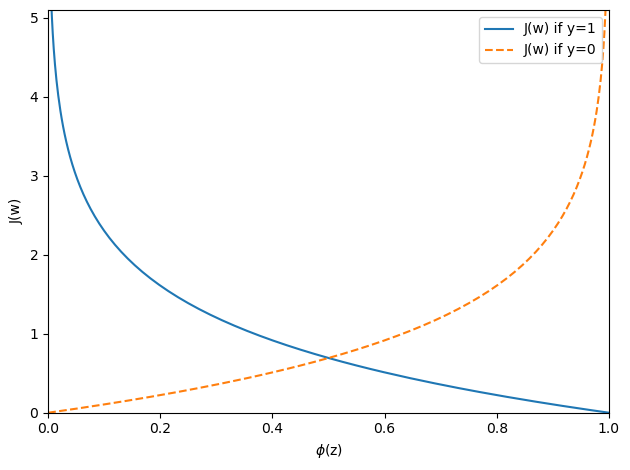

In [19]:
def cost_1(z): #if y=1 -> sigmoid(z)
    return - np.log(sigmoid(z))


def cost_0(z): #if y=0 -> 1 - sigmoid(z)
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

2. 경사 하강법을 사용한 로지스틱 회귀 분류기

아달린 + 배치 경사 하강법 (이진 분류모델로만 사용가능한 코드)
- 선형 활성화 함수 -> 시그모이드 활성화 함수
- 임계함수 -1, 1 -> 0, 1  ==> 
- 비용함수 교체

In [21]:
#로지스틱 회귀 분류기(LogisticRegression) + (배치)경사하강법 (batch gradient desent)
class LogisticRegressionGD(object):
    """
    매개변수: eta/ n_iter/ random_state
    -----------
    속성: w_ / cost_ 

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

#train data 학습  
    def fit(self, X, y):
        """
        매개변수: X/ y
        ----------
        반환값: self
        """
        #1. 가중치 작은 값으로 초기화
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        #2.각 train data : x에 대해 출력값 계산, 가중치 업뎃
        for i in range(self.n_iter):
            # 2-1) 입->출력값 계산
            net_input = self.net_input(X)
            output = self.activation(net_input)
            # 2-2) 가중치, 비용함수 계산
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #(아달린과 차이) 오차 제곱합 대신 로지스틱 비용을 계산
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            #2-3)비용 기록
            self.cost_.append(cost)
        return self

#입력
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

#(아달린과 차이) 로지스틱 시그모이드 활성화 계산
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

#(아달린과 차이) 클레스 레이블 예측-> 단위 계단 함수 사용 // 1,0
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일함
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

클래스 0, 1을 구별하는 이진 분류 모델로 붓꽃 분류

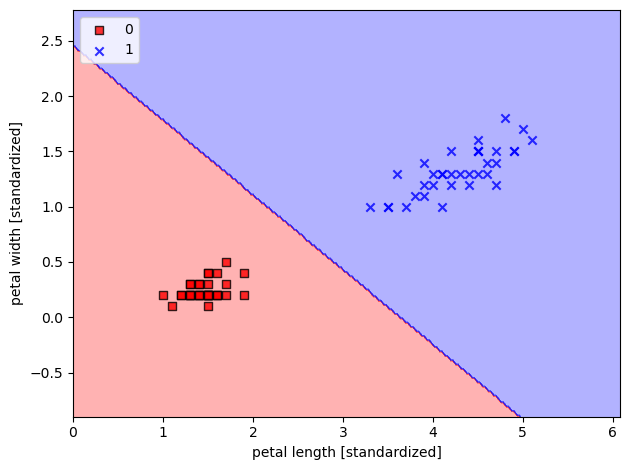

In [22]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 2-3.로지스틱 회귀 모델 훈련하기 (사이킷런)

C:\Users\jsm36\AppData\Local\Temp\ipykernel_3568\2532613655.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


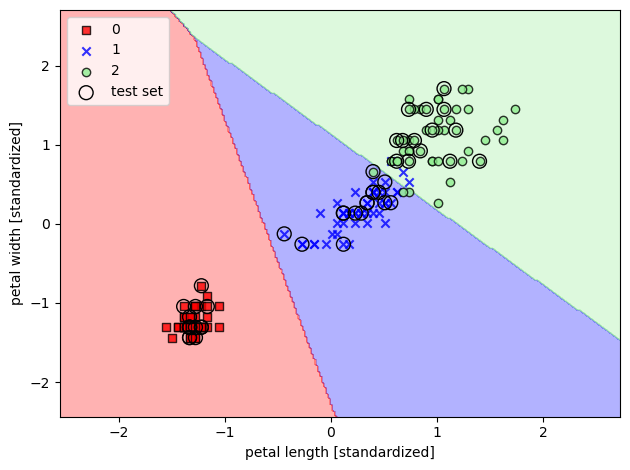

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

train data가 어떤 클레스에 속할 확률

In [27]:
# ~3까지 데이터가 각각 클레스에 속 할 확률 
# 첫번째 데이터) 85.5%정도의 확률-> 2번 클레스
# 두번째 데이터) 83.3%정도의 확률-> 0번 클레스
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [18]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1) #각 행의 확률을 모두 더하면 1

array([1., 1., 1.])

In [30]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1) #max 클레스 번호

array([2, 0, 0], dtype=int64)

In [31]:
lr.predict(X_test_std[:3, :]) #predict로 바로 예측 값만 얻을 수 도 있음

array([2, 0, 0])

In [32]:
lr.predict(X_test_std[0, :].reshape(1, -1)) #하나의 인덱스만 알고 싶을땐 reshape을 써줘야함

array([2])

### 2-4. 규제를 사용해 과대적합 피하기

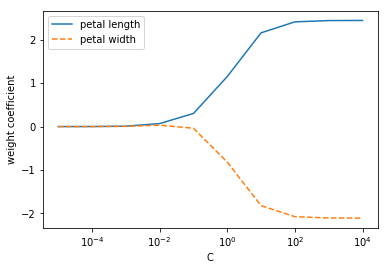

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# 3. 서포트 벡터 머신을 사용한 최대 마진 분류

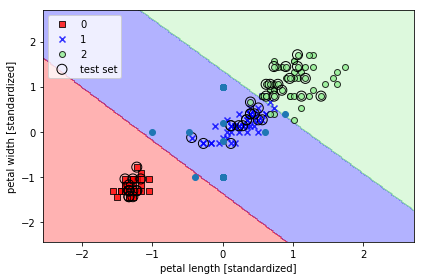

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
svm.coef_

array([[-1.28108835, -1.08908074],
       [-0.68216416, -0.56900015],
       [-2.20580665, -1.9370517 ]])

In [25]:
svm.dual_coef_, svm.dual_coef_.shape

(array([[ 0.88134491,  0.60379849, -1.        , -0.        , -0.        ,
         -0.        , -0.        , -0.4851434 , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.39455455],
        [ 0.39455455,  0.        ,  0.        ,  1.        ,  0.19375927,
          1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         -1.        , -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -0.19375927, -1.        ,
         -1.        ]]), (2, 26))

## 사이킷런의 다른 구현

In [26]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

# 4. 커널 SVM을 사용하여 비선형 문제 풀기

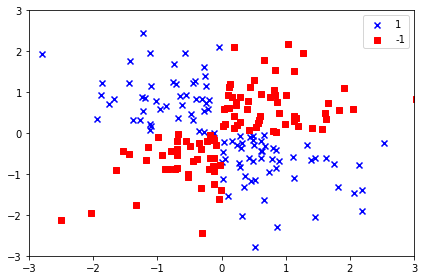

In [27]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

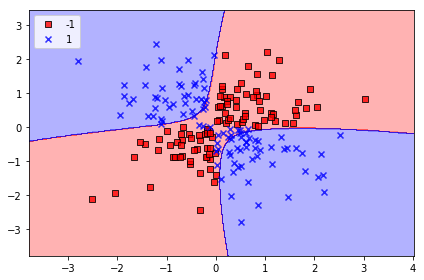

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

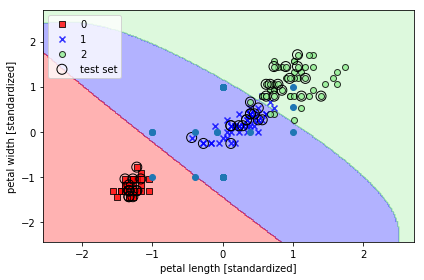

In [29]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

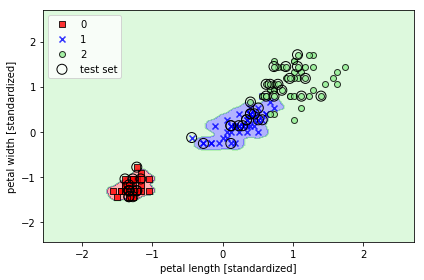

In [30]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 5. 결정 트리 학습

## 정보 이득 최대화-자원을 최대로 활용하기

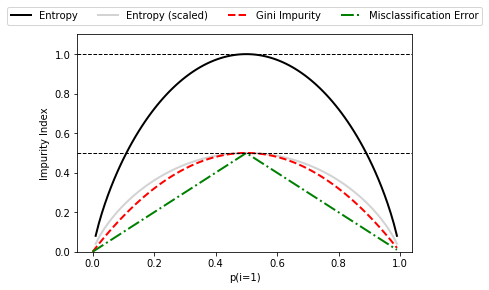

In [31]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## 결정 트리 만들기

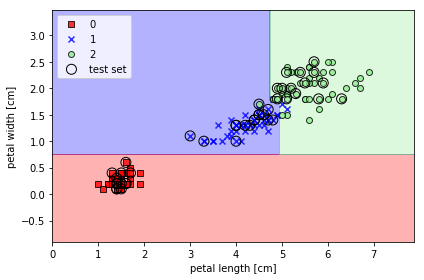

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

![붓꽃 데이터셋의 결정 트리](tree.png "붓꽃 데이터셋의 결정 트리")

## 랜덤 포레스트로 여러 개의 결정 트리 연결하기

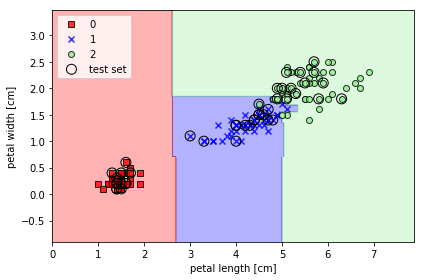

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 6. K-최근접 이웃: 게으른 학습 알고리즘

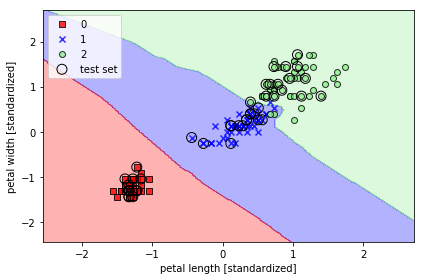

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()